## A tremendously brief R tutorial

Hadley Wickham is better at teaching R than I am and it brings me absolutely no shame to say so. If you want to understand how R works and to quickly learn how to put R into practice, your best bet is to turn to his R for data science course and dig in. But like it's unnessessary to learn all of calculus to calculate acceleration, you don't need an entire course on R to get started using M-lab data in R. 

Here I'll go over some functions that come up repeatedly in my Jupyter notebook M-lab in R tutorial. You can and probably should read about these functions elsewhere if you want to really understand their full capabilities, but for the time being, I'd like to give enough of an understanding of how the functions work so that you can follow along with the M-lab tutorial. 

 
 First we'll load the libraries we need:

In [18]:
library(tidyverse)
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



### Base R functions:
c(),\[\], $, length(), which(), seq, summary, quantiles, paste, cut, data.frame,
na.omit  

#### c(): 
The function c() is the basic function used for constructing vectors in R. It can be used like the \[ \] operator in Python. In R, either numbers or 1-d variables can be concatenated into vectors using the c() function. 

In [3]:
x = c(1,3,5,7)
y = c(8,9,10,11,12,13)
c(x,y)

[1]  1  3  5  7  8  9 10 11 12 13

#### \[ \]: 
The function \[\] is used for array slicing and will be one of your most used functions. Either wth a vector or a multi-dimensional array, the \[\] function allows the selection of individual elements, or subsets (like rows and columns of a matrix). Unlike Python and other languages, R is not zero-indexed. Negative indices are allowed and will remove the elements of the vector that are specified. Check out the third line below for an example. 

A useful point to note is that you can subset a vector by another vector without doing list comprehension or anything of the sort. Lines 4 and 5 have examples of that. The ":" function below builds a range object from the first number to the second one.

In [4]:
z = c(x,y)
z[3]
z[-1]
z.indices = 1:5
z[z.indices]

[1] 5

[1]  3  5  7  8  9 10 11 12 13

[1] 1 3 5 7 8

#### which(): 
"Which" is the default conditioning function in R. Given a vector and a condition, it will spit back out the indices of the vector that satisfy the condition. It's an awesome function and has served me well over the years. It's often used for subsetting a variable to get the elements that satisfy a condition. 

In [5]:
which(z<10)
z[which(z<10)]

[1] 1 2 3 4 5 6

[1] 1 3 5 7 8 9

#### length(): 
Like a stop sign, the length() function is both self-explanatory and tremendously useful. This function gives you the length of an object you pass its way. I usually end up using length to initialize vectors of a particular length using the "vector" or "rep" functions or combined with "which" to calculate percentages. Here are examples of both.

In [6]:
rep(0, length(z))
length(which(z<10))/length(z)

[1] 0 0 0 0 0 0 0 0 0 0

[1] 0.6

#### seq(): 
Similar to c(),:, and rep(), seq() is a function for creating vectors. This one's a little more flexible though since it allows for a more programatic description of the vector you're creating. By setting parameters like start, end, length.out, and by, you can can specify particularly useful vectors.

In [7]:
seq(from=0, to =10)
seq(from=0, to=10, by=2)
seq(from =1000, to = 0, length.out = 5)

[1]  0  1  2  3  4  5  6  7  8  9 10

[1]  0  2  4  6  8 10

[1] 1000  750  500  250    0

#### summary
Summary is a tremendously useful function that produces the five-number summary, often called the Tukey five-number summary after the hallowed statistician John Tukey, and the mean. It contains the minimum, first quartile, median, mean, third quartile, and the maximum. It's a numerical equivalent to a box plot and great for getting a rough sense of what kind of data you're dealing with. 

The function I'm using below, "runif" comes from a set of some of R's best functions: functions that randomly sample from given distributions. This randomly samples from a uniform distribution 1000 samples between 0 and 100. As expected, each summary number is close to its quantile.

In [8]:
r=runif(1000, 0 ,100)
summary(r)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.08342 26.83000 51.24000 50.11000 73.94000 99.90000 

#### cut
Cut is one of my favorite functions for grouping a quantitative variable into categorical bins, something that is done all the time in visualization to make differences, often regional ones, more immediately noticable. 

You provide a vector and either a number of bins you want the vector cut into or the contiguous ranges making up the bins, and cut does the rest.  Below, I'm using another useful function for "getting a sense of things" called table. This function builds a histogram of data, telling you for each value observed, the number vector elements with that value. This shows the different bins and the number of elements that fell into each bin. 

In [9]:
table(cut(r, breaks=3))


(-0.0164,33.4]    (33.4,66.6]     (66.6,100] 
           324            350            326 

#### data.frame
This function will come up \*all\* \*the\* \*time\*, especially if you're using the tidyverse functions we'll cover next. It allows for the construction of a data frame object, either from a matrix or separate columns, that can and should be used in just about any kind of R work. It also allows you to easily rename your columns. Rnorm is the corresponding runif function for the normal distribution, where the first parameter is the number of draws, the second is the mean, and the third is the standard deviation.

In [10]:
X=data.frame(first.column=rnorm(10, 0,1), second.column=rnorm(10, 0,1))
X

first.column,second.column
0.18738240,1.03612467
1.14704792,0.84339603
-0.12375013,-0.63599026
1.31218888,-1.09399721
0.01028308,-1.53529143
0.75385574,-0.53025956
-0.82837066,-0.08924672
-1.01065483,1.42300416
0.65375157,0.57062321
-2.01708695,0.50513973


#### \$
How do you get that sweet, sweet data out of a data frame when you need it? You can always use [] to slice along the dimension you want (first dimension for rows, second dimension for columns), but if your columns are named, your code will be a lot more readable if you use the \$ to select by the name of your variable. Notice the two selections below are identical. 

In [11]:
X$first.column
X[,1]

[1]  0.18738240  1.14704792 -0.12375013  1.31218888  0.01028308  0.75385574
 [7] -0.82837066 -1.01065483  0.65375157 -2.01708695

[1]  0.18738240  1.14704792 -0.12375013  1.31218888  0.01028308  0.75385574
 [7] -0.82837066 -1.01065483  0.65375157 -2.01708695

#### na.omit 
If you have NA's in your data that you want to get rid of, na.omit is a great function to use.

As you can see in the dataframe below, because rows 6-10 had NAs in them, they were thrown out of the final product. The issue with na.omit is that we lost perfect good second.column data this way. If there was something non-random about the missingness in the first.column or if 90% of the dataset was missing, we would want to be more careful than this. 

In [12]:
x = c(1:5, rep(NA, 5), 1:5)
y = c(1:15)
X = data.frame(first.column=x, second.column=y)
na.omit(X)

,first.column,second.column
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
11,1,11
12,2,12
13,3,13
14,4,14
15,5,15


### Tidyverse functions
The tidyverse is more or less an extremely useful dialect of standard R. It's in R and it's based on R but the words and grammar you use are different in intentional ways. Championed by Hadley Wickham but developed by a huge host of other people, everyone should be using the tidyverse in their work at one point or another. Maybe not for everything but used in the right places, these functions are huge timesavers. Here I'll go over a couple you'll see in repeat in the M-lab tutorial. Namely:
filter, mutate, group_by, summarise,%>%, ymd, left_join, ggplot

#### filter, mutate, group_by, summarise
The tidyverse introduces these four functions, which are some of my most used functions in R. Each takes a data set and transforms it in a specified way. Again, they don't _really_ add functionality to R. Everything here can already be done in other ways. But they do make their tasks simpler, more readable, and more readily included in workflows.

I'm including all four of these verbs in this section because they work so closely with one another, some depending necesarily on the others, that the whole "suite" almost feels like a single function. 

What these functions do is largely intuitive from their names.

#### filter 
filter filters data and is in many ways equivalent to using \[\] and which() in conjuction. To use this with a dataset, like our X, you include the dataset and a condition on one of the columns of the dataset that evaluates to TRUE or FALSE. filter then returns the rows of the dataset that satisfy the condition. Here it is next to a which call doing the same thing. 

In [13]:
X[which(is.na(X$first.column)==FALSE),]
filter(X, is.na(first.column)==FALSE)

,first.column,second.column
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
11,1,11
12,2,12
13,3,13
14,4,14
15,5,15


first.column,second.column
1,1
2,2
3,3
4,4
5,5
1,11
2,12
3,13
4,14
5,15


#### mutate
Mutate is a useful function for building workflows because it allows you to change the columns of a dataset by applying functions to them. This becomes especially useful when combined with the pipe operator I'll introduce in a second. 

Mutate, like filter, takes a data.frame. Instead of a condition, however, it now expects a function called on a column of the data.frame. It will apply the function to each of the rows of the data.frame (the way many parallel processing methods work), and it returns a data frame with same number of rows as the original but with one extra column corresponding to the newly transformed column. You can and should name the new column in the function call to avoid the function call becoming the name of the column

In [14]:
Y<-data.frame(X, third.column=rnorm(nrow(X)))

Z<-mutate(filter(Y, is.na(first.column)==FALSE), transformed.column=second.column*third.column+.05)
Z

first.column,second.column,third.column,transformed.column
1,1,0.3797593,0.4297593
2,2,0.8734162,1.7968323
3,3,0.4427871,1.3783613
4,4,0.7031164,2.8624656
5,5,0.1153284,0.6266419
1,11,-0.3376468,-3.6641144
2,12,0.3382315,4.1087782
3,13,-1.6598457,-21.5279941
4,14,0.1602044,2.2928613
5,15,-0.5579384,-8.3190754


#### group_by and summarise
If you see one of these functions, you're almost guaranteed to see the other just around the corner. The reason, in this case, is simple: group_by groups your data into buckets and summarise summarises the results in a given way within each of those buckets. You can think of summarise as doing what mutate does, but instead of applying the function to each row independently, summarise reduces the size of the dataset by aggregating rows together using a function.

This combo is tremendously useful for understanding how different subsets of your data differ, for producing comparative statistics, and it proves vital for doing those things visually using ggplot as well. 

Using our newly transformed dataset, let's see what that looks like. First, I'm creating an index column, using mutate, that corresponds to whether the second column is greater than or less than 10. Then, I'm going to group_by column and calculate the mean of transformed.column for each group. We know the second group's mean will have a larger absolute value because the transformed.mean is directly related to the value of the second column.


In [15]:
summarise(group_by(mutate(Z, index.column=ifelse(second.column>10, "greater", "less than"))
                   , index.column), avg=mean(transformed.column))

index.column,avg
greater,-5.421909
less than,1.418812


#### %>%
The problem now is that things are starting to get unreadable. We're burying functions in functions and starting to lose the ability to read our code, one of the primary benefits of using the tidyverse. 

That's where this odd-looking fellow comes in. This is the pipe operator in R. It's used to clean up code and make it more readable. It takes the output of what's on the left of it and passes it to the function on its right, unwrapping what might be many nested parentheses. 

I'm going to re-write the last group_by/summarise expression using pipes instead of parentheses. Now, the difference in their legibility is clear, but another benefit is that the order of the code matches the order of its execution. 

English is read left to right and so is R. But above, the first function you see is "summarise" which is actually the last function to be executed. On the other hand, here, what you see is what's happening. Your data gets grouped first then summarised. You can imagine how useful this gets when you start including more operations in your pipeline.



In [16]:
Z%>%mutate(index.column=ifelse(second.column>10, "greater", "less than"))%>%
group_by(index.column)%>%summarise(avg=mean(transformed.column))

index.column,avg
greater,-5.421909
less than,1.418812


#### ymd
Ymd is a function that changes date objects into useable date objects. It's fantastic. You can now add and subtract dates, create sequences of dates, and generally treat them in intuitive ways. It's also part of a package called lubridate, which is a great name. 

In [19]:
date.a<-ymd("2017-05-12")
date.b<-ymd("2017-05-19")
date.a
date.b-date.a
seq(date.a, date.b, "day")

[1] "2017-05-12"

Time difference of 7 days

[1] "2017-05-12" "2017-05-13" "2017-05-14" "2017-05-15" "2017-05-16"
[6] "2017-05-17" "2017-05-18" "2017-05-19"

#### left_join
This function won't be new to anyone who has used database languages before and it figures quite heavily into many useful BigQuery queries, which are where M-lab data is stored, so understanding how joins works is a close to a necessity. I won't give a tutorial into them, I'll just say if you have data frames X and Y that share a column (say, the name of an employee) and you want add data from Y to X by matching on that column, you can do that with a join.

In [20]:
W = data.frame(first.column=seq(1,5,1), categories=c("a","a","a","b","b"))
W
Z
Z.final<-left_join(Z, W, by = "first.column")
Z.final

first.column,categories
1,a
2,a
3,a
4,b
5,b


first.column,second.column,third.column,transformed.column
1,1,0.3797593,0.4297593
2,2,0.8734162,1.7968323
3,3,0.4427871,1.3783613
4,4,0.7031164,2.8624656
5,5,0.1153284,0.6266419
1,11,-0.3376468,-3.6641144
2,12,0.3382315,4.1087782
3,13,-1.6598457,-21.5279941
4,14,0.1602044,2.2928613
5,15,-0.5579384,-8.3190754


first.column,second.column,third.column,transformed.column,categories
1,1,0.3797593,0.4297593,a
2,2,0.8734162,1.7968323,a
3,3,0.4427871,1.3783613,a
4,4,0.7031164,2.8624656,b
5,5,0.1153284,0.6266419,b
1,11,-0.3376468,-3.6641144,a
2,12,0.3382315,4.1087782,a
3,13,-1.6598457,-21.5279941,a
4,14,0.1602044,2.2928613,b
5,15,-0.5579384,-8.3190754,b


#### ggplot
Finally, we come to perhaps the most famous package in the tidyverse and certainly one of the most important. ggplot is the plotting package the tidyverse provides and it makes plotting in R a much more standardized affair. Every ggplot takes three inputs: data, an aesthetic mapping, and a geometry. In the abstract, that's confusing, but with some practice it simplifies the plotting process. The data part is clear. You need data to plot data. 

The aesthetic mapping refers to function aes(). In a broad sense, this function tells ggplot what should be the x and y axes, how to color things in, what line types should be assigned. What's nice is that each of these can be specified to vary by variable, making comparisons in graphs much easier. 

Lastly, the geometric element tells ggplot what kind of plot you'd like to see. geom_line does line plots, geom_bar does bar plots, geom_point does scatter plots. So on and so forth. 

This kind of flexible and modular plotting package means that by changing a single parameter in a plotting pipeline you can produce totally different graphs.

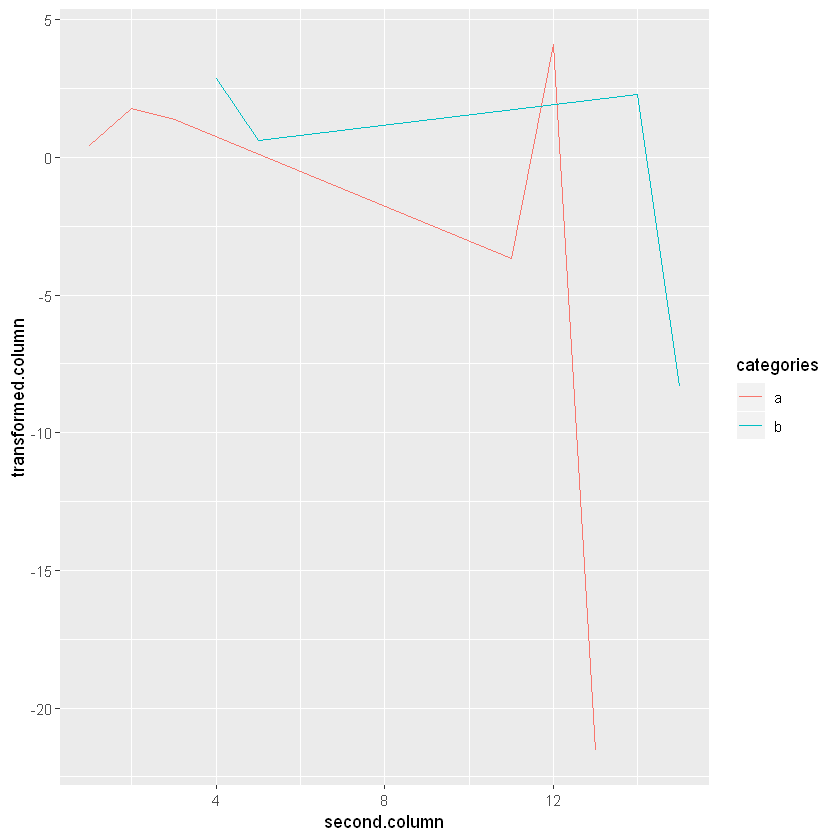

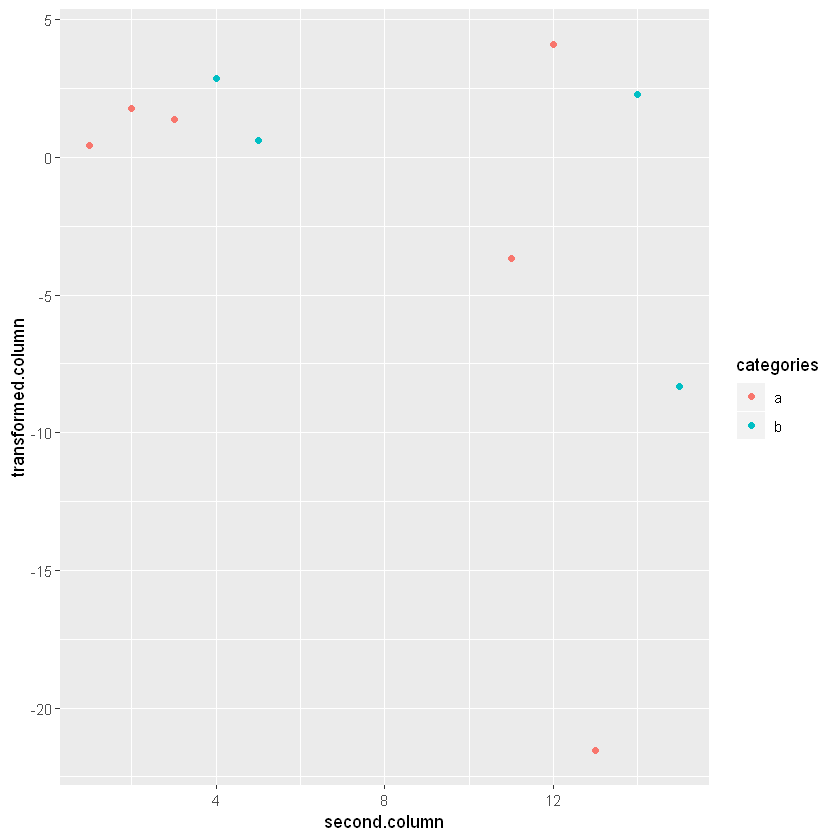

In [21]:
Z.final%>%ggplot(aes(x = second.column, y = transformed.column, col=categories))+geom_line()
Z.final%>%ggplot(aes(x = second.column, y = transformed.column, col=categories))+geom_point()

## Conclusion
And there's an amazingly brief tutorial to R. It covers the functions that are used in my M-lab data analysis tutorial and you can now hopefully follow along or copy/paste the commands in that tutorial in a way that's useful to your own research. If you have any questions feel free to reach out at nick.thieme5@gmail.com